In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Importante: O exemplo GIANTSTEPS3519546.LOFI não pode ser utilizado. Tempo mais curto que a janela.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import shutil
#shutil.copy2("/content/drive/MyDrive/utilities.py", "/content/utilities.py")
#shutil.copy2("/content/drive/MyDrive/ConvNet3DSpecShanMorl.py", "/content/ConvNet3DSpecShanMorl.py")
#shutil.copy2("/content/drive/MyDrive/config.py", "/content/config.py")

'/content/config.py'

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.data import AUTOTUNE
import matplotlib.pyplot as plt
import tensorflow as tf
import argparse
import os
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import Audio, clear_output, display
from glob import glob
import random

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


In [3]:
BS = 32 #batch size

base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

<ipython-input-3-2ab2edfa481a>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 150, 150,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 150, 150,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 150, 150,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 150, 150,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 150, 150,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 150, 150,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 150, 150,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 150, 150,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 151, 151,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 75, 75,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 75, 75,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 75, 75,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 75, 75,    │      2,304 │ block_1_depthwis

 Total params: 2,753,760 (10.50 MB)

 Trainable params: 1,691,658 (6.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

 Optimizer params: 330,518 (1.26 MB)

# k=1

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento1.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training1")
VAL_DATASET = os.path.join("/content", "validation1")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step - accuracy: 0.2095 - loss: 2.2628 - val_accuracy: 0.4650 - val_loss: 1.7418
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4621 - loss: 1.6041 - val_accuracy: 0.5150 - val_loss: 1.4663
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5093 - loss: 1.4529 - val_accuracy: 0.5800 - val_loss: 1.3619
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5475 - loss: 1.3124 - val_accuracy: 0.5800 - val_loss: 1.2817
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5955 - loss: 1.1792 - val_accuracy: 0.6200 - val_loss: 1.2126
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6530 - loss: 1.0785 - val_accuracy: 0.6250 - val_loss: 1.2343
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6244 - loss: 1.1033 - val_accuracy: 0.6350 - val_loss: 1.2100
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6614 - loss: 0.9531 - val_accuracy: 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9884 - loss: 0.0588 - val_accuracy: 0.7300 - val_loss: 1.2224
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9956 - loss: 0.0613 - val_accuracy: 0.7250 - val_loss: 1.2314
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9788 - loss: 0.0783 - val_accuracy: 0.7250 - val_loss: 1.2394
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9913 - loss: 0.0525 - val_accuracy: 0.7200 - val_loss: 1.2389
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9913 - loss: 0.0594 - val_accuracy: 0.7100 - val_loss: 1.2443
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9910 - loss: 0.0558 - val_accuracy: 0.7150 - val_loss: 1.2499
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9916 - loss: 0.0536 - val_accuracy: 0.7150 - val_loss: 1.2402
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9975 - loss: 0.0382 - val_accuracy: 0.7150 - v

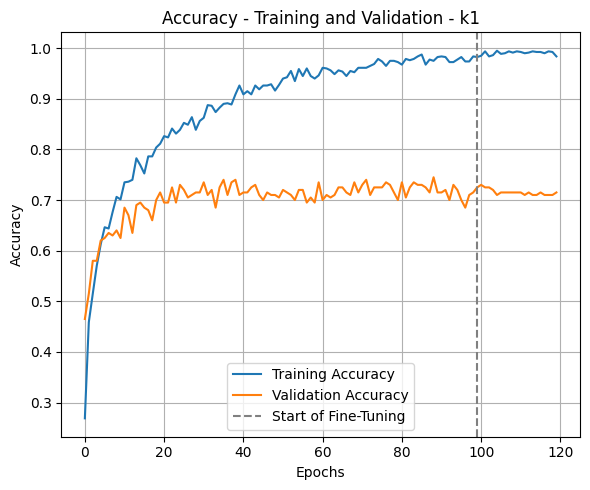

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/accuracy_genre_mel_k1.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/acc_total_k1.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/val_acc_total_k1.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k1.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k1.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


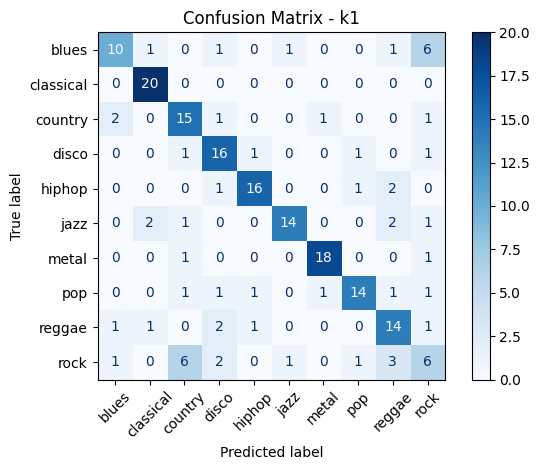

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k1")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/confusionmatrix_genre_mel_k1.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=2

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento2.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training2")
VAL_DATASET = os.path.join("/content", "validation2")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.1974 - loss: 2.2637 - val_accuracy: 0.5200 - val_loss: 1.5734
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4653 - loss: 1.5337 - val_accuracy: 0.5100 - val_loss: 1.4032
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5113 - loss: 1.3119 - val_accuracy: 0.5450 - val_loss: 1.3150
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5391 - loss: 1.2827 - val_accuracy: 0.5950 - val_loss: 1.2190
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6385 - loss: 1.0841 - val_accuracy: 0.6200 - val_loss: 1.2190
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6492 - loss: 1.0125 - val_accuracy: 0.6100 - val_loss: 1.1456
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7000 - loss: 0.8969 - val_accuracy: 0.6400 - val_loss: 1.0922
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7024 - loss: 0.8885 - val_accuracy: 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9828 - loss: 0.0763 - val_accuracy: 0.6900 - val_loss: 1.3090
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9976 - loss: 0.0495 - val_accuracy: 0.6800 - val_loss: 1.3073
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9978 - loss: 0.0479 - val_accuracy: 0.6900 - val_loss: 1.3092
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9890 - loss: 0.0652 - val_accuracy: 0.6900 - val_loss: 1.3146
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9965 - loss: 0.0470 - val_accuracy: 0.6900 - val_loss: 1.3208
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9933 - loss: 0.0489 - val_accuracy: 0.6900 - val_loss: 1.3144
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9985 - loss: 0.0372 - val_accuracy: 0.6900 - val_loss: 1.3225
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9950 - loss: 0.0450 - val_accuracy: 0.6900 - v

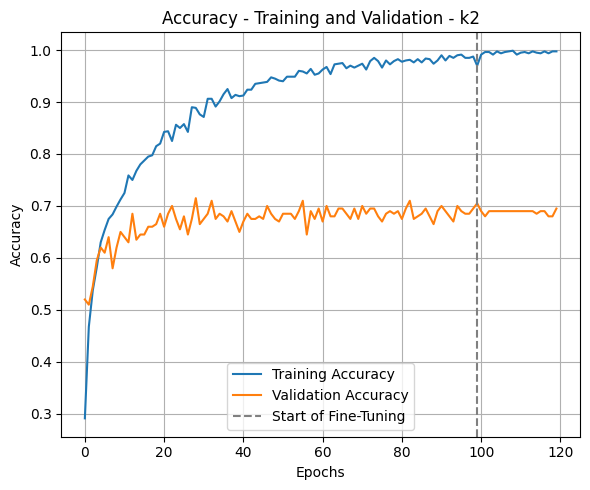

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/accuracy_genre_mel_k2.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/acc_total_k2.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/val_acc_total_k2.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k2.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


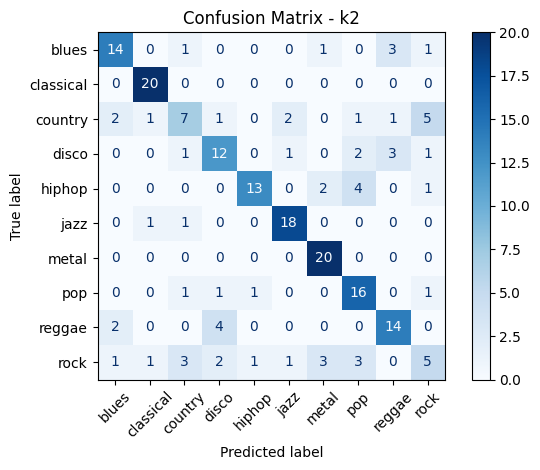

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k2")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/confusionmatrix_genre_mel_k2.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=3

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento3.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training3")
VAL_DATASET = os.path.join("/content", "validation3")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.1885 - loss: 2.2811 - val_accuracy: 0.4850 - val_loss: 1.6200
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4569 - loss: 1.5783 - val_accuracy: 0.5300 - val_loss: 1.3828
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5029 - loss: 1.3819 - val_accuracy: 0.5900 - val_loss: 1.2694
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6059 - loss: 1.2102 - val_accuracy: 0.5700 - val_loss: 1.2182
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6078 - loss: 1.1276 - val_accuracy: 0.5950 - val_loss: 1.1568
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6266 - loss: 1.0717 - val_accuracy: 0.5650 - val_loss: 1.1603
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6412 - loss: 1.0139 - val_accuracy: 0.6050 - val_loss: 1.0760
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7090 - loss: 0.9257 - val_accuracy: 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9931 - loss: 0.0556 - val_accuracy: 0.7000 - val_loss: 1.0101
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9907 - loss: 0.0496 - val_accuracy: 0.6950 - val_loss: 1.0157
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9924 - loss: 0.0458 - val_accuracy: 0.7000 - val_loss: 1.0173
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9852 - loss: 0.0526 - val_accuracy: 0.6950 - val_loss: 1.0274
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9929 - loss: 0.0481 - val_accuracy: 0.7000 - val_loss: 1.0307
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9976 - loss: 0.0423 - val_accuracy: 0.7000 - val_loss: 1.0334
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9857 - loss: 0.0503 - val_accuracy: 0.7000 - val_loss: 1.0305
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9960 - loss: 0.0366 - val_accuracy: 0.7050 - v

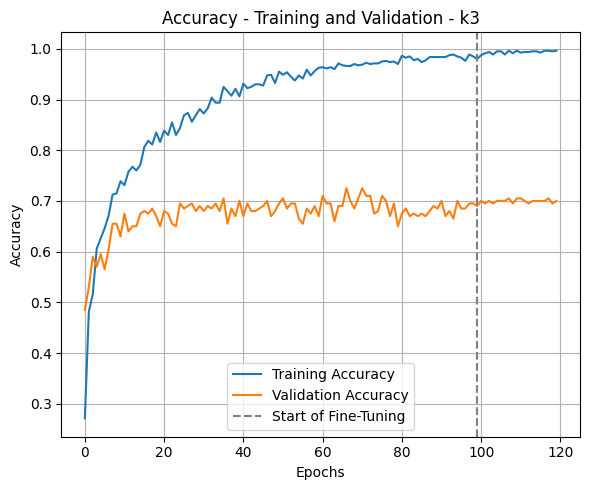

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/accuracy_genre_mel_k3.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/acc_total_k3.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/val_acc_total_k3.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k3.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k3.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


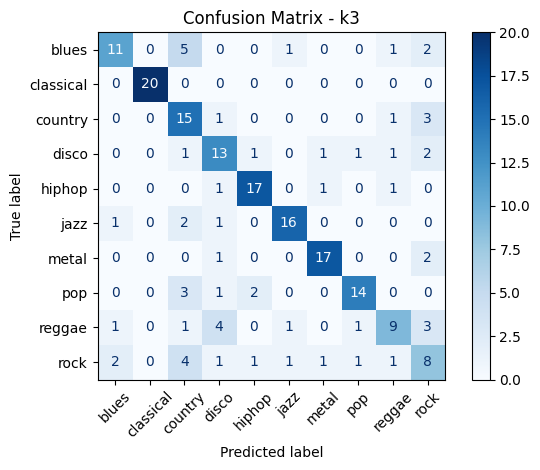

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k3")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/confusionmatrix_genre_mel_k3.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=4

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento4.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training4")
VAL_DATASET = os.path.join("/content", "validation4")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.2051 - loss: 2.2461 - val_accuracy: 0.4450 - val_loss: 1.6824
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4371 - loss: 1.6489 - val_accuracy: 0.5100 - val_loss: 1.4500
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5427 - loss: 1.3638 - val_accuracy: 0.5550 - val_loss: 1.3103
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5756 - loss: 1.2238 - val_accuracy: 0.5900 - val_loss: 1.2148
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6533 - loss: 1.0955 - val_accuracy: 0.6200 - val_loss: 1.1575
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6682 - loss: 1.0240 - val_accuracy: 0.6150 - val_loss: 1.0994
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6794 - loss: 0.9687 - val_accuracy: 0.6750 - val_loss: 1.0618
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6944 - loss: 0.8963 - val_accuracy: 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9862 - loss: 0.0608 - val_accuracy: 0.6950 - val_loss: 1.1940
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9892 - loss: 0.0514 - val_accuracy: 0.6900 - val_loss: 1.1935
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9932 - loss: 0.0483 - val_accuracy: 0.6950 - val_loss: 1.1924
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9958 - loss: 0.0375 - val_accuracy: 0.6950 - val_loss: 1.1946
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9929 - loss: 0.0436 - val_accuracy: 0.6950 - val_loss: 1.1970
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9850 - loss: 0.0530 - val_accuracy: 0.6850 - val_loss: 1.1980
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9988 - loss: 0.0325 - val_accuracy: 0.6800 - val_loss: 1.2035
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9887 - loss: 0.0520 - val_accuracy: 0.6850 - v

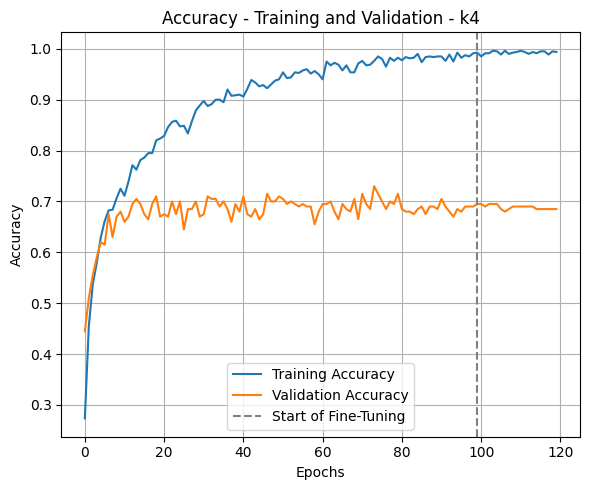

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/accuracy_genre_mel_k4.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/acc_total_k4.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/val_acc_total_k4.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k4.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k4.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


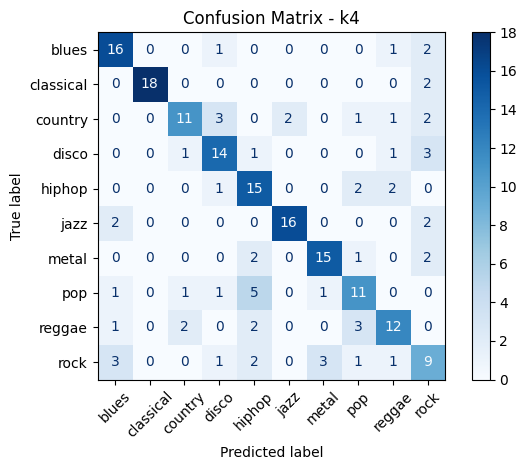

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k4")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/confusionmatrix_genre_mel_k4.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=5

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento5.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training5")
VAL_DATASET = os.path.join("/content", "validation5")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 348ms/step - accuracy: 0.1813 - loss: 2.3671 - val_accuracy: 0.4650 - val_loss: 1.6303
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4131 - loss: 1.6334 - val_accuracy: 0.5300 - val_loss: 1.3434
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5258 - loss: 1.3257 - val_accuracy: 0.5750 - val_loss: 1.2216
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5643 - loss: 1.2626 - val_accuracy: 0.6400 - val_loss: 1.0822
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6001 - loss: 1.1512 - val_accuracy: 0.6450 - val_loss: 1.0115
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6326 - loss: 1.0793 - val_accuracy: 0.6650 - val_loss: 0.9832
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6558 - loss: 0.9993 - val_accuracy: 0.7000 - val_loss: 0.9085
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6654 - loss: 0.9805 - val_accuracy: 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9810 - loss: 0.0799 - val_accuracy: 0.7450 - val_loss: 0.8957
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9890 - loss: 0.0657 - val_accuracy: 0.7450 - val_loss: 0.8826
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9959 - loss: 0.0530 - val_accuracy: 0.7400 - val_loss: 0.8822
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9957 - loss: 0.0416 - val_accuracy: 0.7450 - val_loss: 0.8851
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9958 - loss: 0.0504 - val_accuracy: 0.7400 - val_loss: 0.8874
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9954 - loss: 0.0383 - val_accuracy: 0.7400 - val_loss: 0.8803
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9906 - loss: 0.0453 - val_accuracy: 0.7400 - val_loss: 0.8748
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9971 - loss: 0.0488 - val_accuracy: 0.7400 - v

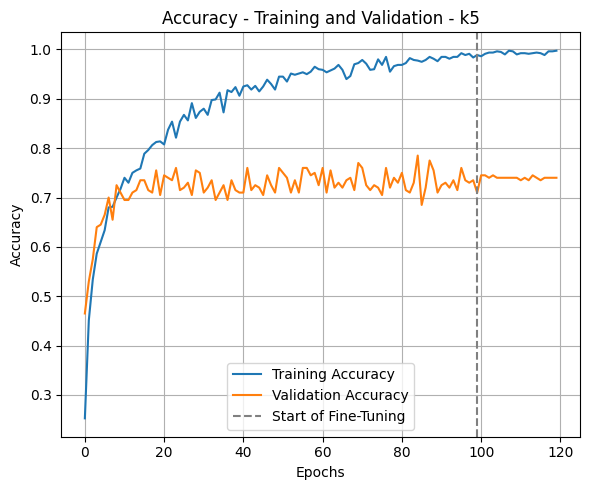

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/accuracy_genre_mel_k5.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/acc_total_k5.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/val_acc_total_k5.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k5.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/model_k5.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


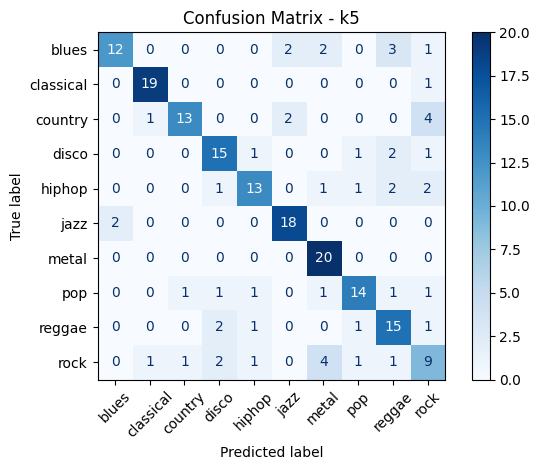

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k5")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold/confusionmatrix_genre_mel_k5.pdf')
plt.show()

In [27]:
from google.colab import runtime
runtime.unassign()

# Geração de Tabela

In [25]:
import numpy as np
import pandas as pd
import os

# Diretório base onde os arquivos estão salvos
base_path = "/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_scal_mel_kfold"

# Inicializa dicionários para os resultados
final_train_acc = {}
max_train_acc = {}
final_val_acc = {}
max_val_acc = {}

# Loop para k = 1 até 5
for k in range(1, 6):
    acc_path = os.path.join(base_path, f"acc_total_k{k}.npy")
    val_acc_path = os.path.join(base_path, f"val_acc_total_k{k}.npy")

    acc = np.load(acc_path)
    val_acc = np.load(val_acc_path)

    final_train_acc[f'k{k}'] = acc[-1]
    max_train_acc[f'k{k}'] = np.max(acc)
    final_val_acc[f'k{k}'] = val_acc[-1]
    max_val_acc[f'k{k}'] = np.max(val_acc)

# Calcula a média e desvio padrão para cada linha
def add_resultado_final_std(row):
    valores = np.array([v for v in row.values()])
    return np.mean(valores), np.std(valores)

# Construindo DataFrame
df = pd.DataFrame({
    "Acurácia Final - Treinamento": final_train_acc,
    "Valor Máximo Acurácia - Treinamento": max_train_acc,
    "Acurácia Final - Validação": final_val_acc,
    "Valor Máximo Acurácia - Validação": max_val_acc
}).T

# Adiciona colunas de média e desvio padrão
df["Resultado Final"] = df.mean(axis=1)
df["Desvio Padrão"] = df.std(axis=1)

In [26]:
df

,k1,k2,k3,k4,k5,Resultado Final,Desvio Padrão
Acurácia Final - Treinamento,0.98375,0.99750,0.99625,0.99375,0.9975,0.99375,0.005184
Valor Máximo Acurácia - Treinamento,0.99500,0.99875,0.99625,0.99625,0.9975,0.99675,0.001275
Acurácia Final - Validação,0.71500,0.69500,0.70000,0.68500,0.7400,0.70700,0.019131
Valor Máximo Acurácia - Validação,0.74500,0.71500,0.72500,0.73000,0.7850,0.74000,0.024495
